# Modelo de red neuronal artificial

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.preprocessing import LabelEncoder

Caragmos los datos de viviendas, acompañados de datos sobre el paro y las rentas en cada municipio

In [8]:
# df = pd.read_csv('../input/datos-tfm-completos/DatosCompletos.csv')
df = pd.read_csv('/kaggle/input/datos-viviendas-tfm/DatosCompletos.csv')


/tmp/ipykernel_34/2023861092.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/datos-viviendas-tfm/DatosCompletos.csv')


In [9]:
df['CodigoPostal'] = pd.to_numeric(df['CodigoPostal'], errors='coerce')
label = LabelEncoder()
for i in df.columns:
    if df[i].dtypes == object:
        df[i] = label.fit_transform(df[i])

In [10]:
# df = df.drop([
#     'Paro hombre edad < 25',
#     'Paro hombre edad >=45',
#     'Paro mujer edad < 25',
#     'Paro mujer edad 25 -45 ',
#     'Paro Agricultura',
#     'Paro Industria',
#     'Paro construccion',
#     'Paro Servicios',
#     'Paro Sin empleo Anterior',
#     'Mediana de la renta por unidad de consumo',
#     'Renta bruta media por persona',
#     'Renta neta media por persona ',
#     'Renta bruta media por hogar',
#     'total Paro Registrado']
#         ,axis=1)

In [11]:
def check_missing_data(df):
    # 1. Comprobar si hay algún NaN en todo el DataFrame
    print(f"¿Hay algún NaN en el DataFrame? {df.isnull().values.any()}")

    # 2. Comprobar la cantidad de NaN por columna

    print("Cantidad de NaN por columna:\n", df.isnull().sum())

    # 3. Mostrar las filas que contienen NaN
    filas_con_nan = df[df.isnull().any(axis=1)]
    print("Filas que contienen NaN:\n", filas_con_nan)


check_missing_data(df)

¿Hay algún NaN en el DataFrame? True
Cantidad de NaN por columna:
 Fecha                                        0
Caracteristicas                              0
Habitaciones                                 0
Aseos                                        0
Terraza                                      0
Piscina                                      0
Garaje                                       0
Precio                                       0
Metros                                       0
CodigoPostal                                 1
Latitud                                      0
Longitud                                     0
NMUN                                         0
Year                                         0
Mes                                          0
Media de la renta por unidad de consumo      0
Mediana de la renta por unidad de consumo    0
Renta bruta media por hogar                  0
Renta bruta media por persona                0
Renta neta media por hogar              

Vamos a comparar como se comporta el modelo dependiendo de si lo entrenamos con los datos del año 2021, 2022 o los dos añoa juntos.

In [12]:
df = df.dropna(subset=['CodigoPostal'])
# Filtramos datos por año
df_2021 = df[df['Year'] == 2021]
df_2022 = df[df['Year'] == 2022]

In [13]:
check_missing_data(df)

¿Hay algún NaN en el DataFrame? False
Cantidad de NaN por columna:
 Fecha                                        0
Caracteristicas                              0
Habitaciones                                 0
Aseos                                        0
Terraza                                      0
Piscina                                      0
Garaje                                       0
Precio                                       0
Metros                                       0
CodigoPostal                                 0
Latitud                                      0
Longitud                                     0
NMUN                                         0
Year                                         0
Mes                                          0
Media de la renta por unidad de consumo      0
Mediana de la renta por unidad de consumo    0
Renta bruta media por hogar                  0
Renta bruta media por persona                0
Renta neta media por hogar             

In [14]:
def train_ann(data, epochs=200):
    X = data.drop('Precio', axis=1)
    y = data['Precio']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = Sequential()
    model.add(Dense(13,activation='relu'))
    model.add(Dense(23,activation='relu'))
    model.add(Dense(50,activation='relu'))
    model.add(Dense(100,activation='relu'))
    model.add(Dense(200,activation='selu'))
    model.add(Dense(300,activation='selu'))
    model.add(Dense(200,activation='selu'))
    model.add(Dense(50,activation='selu'))
    model.add(Dense(23,activation='selu'))
    model.add(Dense(13,activation='selu'))
    model.add(Dense(1))
    
    model.compile(optimizer='adam',loss='mae')
    history = model.fit(x=X_train, y=y_train.values,
                    validation_data=(X_test,y_test.values),
                    batch_size=250,epochs=epochs, verbose=1)

    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    evs = explained_variance_score(y_test, predictions)
    
    print(f'R2: {rmse}')
    print(f'MAE: {mae}')
    print(f'MSE: {mse}')

    # Graficar la dispersión y la línea de regresión
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.title('Valores Reales vs. Valores Predichos')
    plt.grid(True)
    plt.savefig('/kaggle/working/regression_plot_ANN.png')
    plt.show()

    
    return model, history, mae, mse, rmse, evs, y_test, predictions

Epoch 1/200
 52/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 280836.3125

I0000 00:00:1718880449.778755     119 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


154/154 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 235624.4062 - val_loss: 119828.4453
Epoch 2/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113347.8672 - val_loss: 103643.6406
Epoch 3/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 103898.3906 - val_loss: 101137.0469
Epoch 4/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100869.0781 - val_loss: 98175.7812
Epoch 5/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98264.3672 - val_loss: 95500.7656
Epoch 6/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 95661.4688 - val_loss: 91901.3281
Epoch 7/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 90905.2422 - val_loss: 90710.5234
Epoch 8/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 87371.7109 - val_loss: 82664.1641
Epoch 9/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 81235.9219 - val_loss: 79832.9375
Epoch 10/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 78630.7578 - val_loss: 76371.0391
Epoch 11/200
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

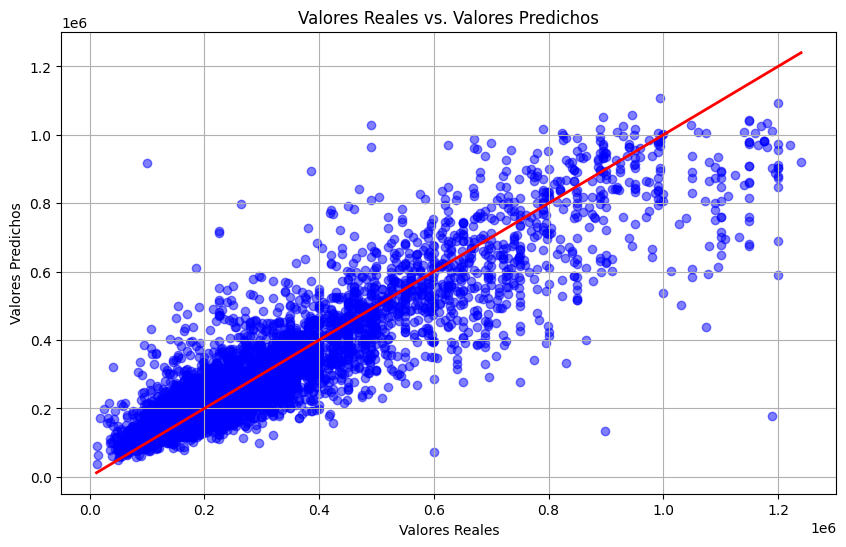

Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 212ms/step - loss: 278109.8125 - val_loss: 267749.9688
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 271512.9062 - val_loss: 262918.5312
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 257391.0781 - val_loss: 121071.5078
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 129021.0781 - val_loss: 119567.2969
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 122872.3906 - val_loss: 115726.5547
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 121522.9766 - val_loss: 114518.7422
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 120310.5391 - val_loss: 113096.0469
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 115514.4531 - val_loss: 111719.0000
Epoch 9/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 111480.1953 - val_loss: 110133.4062
Epoch 10/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 112890.3828 - val_loss: 107842.4688
Epoch 11/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

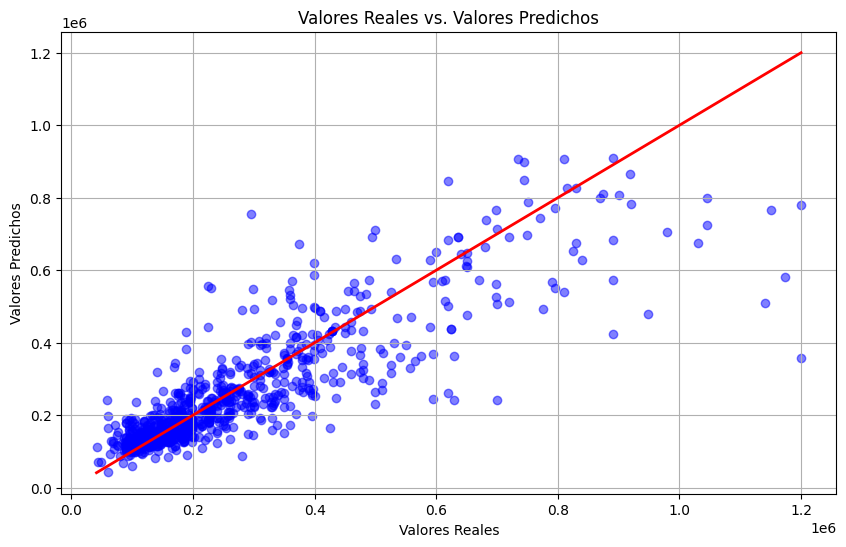

Epoch 1/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 235062.4062 - val_loss: 129624.0625
Epoch 2/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 123711.9766 - val_loss: 110335.7656
Epoch 3/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 105878.4375 - val_loss: 101011.0938
Epoch 4/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98809.1641 - val_loss: 94058.2188
Epoch 5/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 91423.1641 - val_loss: 83126.5391
Epoch 6/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 80167.3984 - val_loss: 75755.9922
Epoch 7/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 74843.4297 - val_loss: 71595.0703
Epoch 8/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 69940.3438 - val_loss: 68266.8594
Epoch 9/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 68899.8984 - val_loss: 66807.5781
Epoch 10/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 67544.1328 - val_loss: 65598.3984
Epoch 11/200
173/173 ━━━━━━━━━━━━━━━━━━━━ 

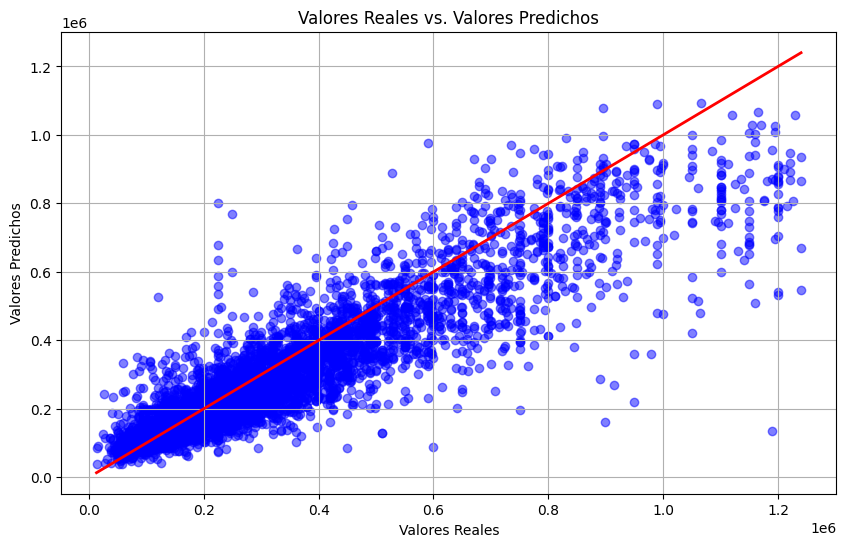

In [15]:
# Entrenar los modelos con los diferentes conjuntos de datos
model_2021, history_2021, mae_2021, mse_2021, rmse_2021, evs_2021, y_2021, pred_2021 = train_ann(df_2021)
model_2022, history_2022, mae_2022, mse_2022, rmse_2022, evs_2022, y_2022, pred_2022 = train_ann(df_2022)
model_all, history_all, mae_all, mse_all, rmse_all, evs_all, y, pred = train_ann(df)

In [16]:
# Comparar los resultados
results = pd.DataFrame({
    'Year': ['2021', '2022', 'All'],
    'MAE': [mae_2021, mae_2022, mae_all],
    'MSE': [mse_2021, mse_2022, mse_all],
    'RMSE': [rmse_2021, rmse_2022, rmse_all],
    'Explained Variance Score': [evs_2021, evs_2022, evs_all]
})
print(results)

   Year           MAE           MSE          RMSE  Explained Variance Score
0  2021  54418.431271  7.551702e+09  86900.528052                  0.831604
1  2022  59018.133111  9.767167e+09  98828.979515                  0.739056
2   All  55817.861538  8.623818e+09  92864.511759                  0.827210


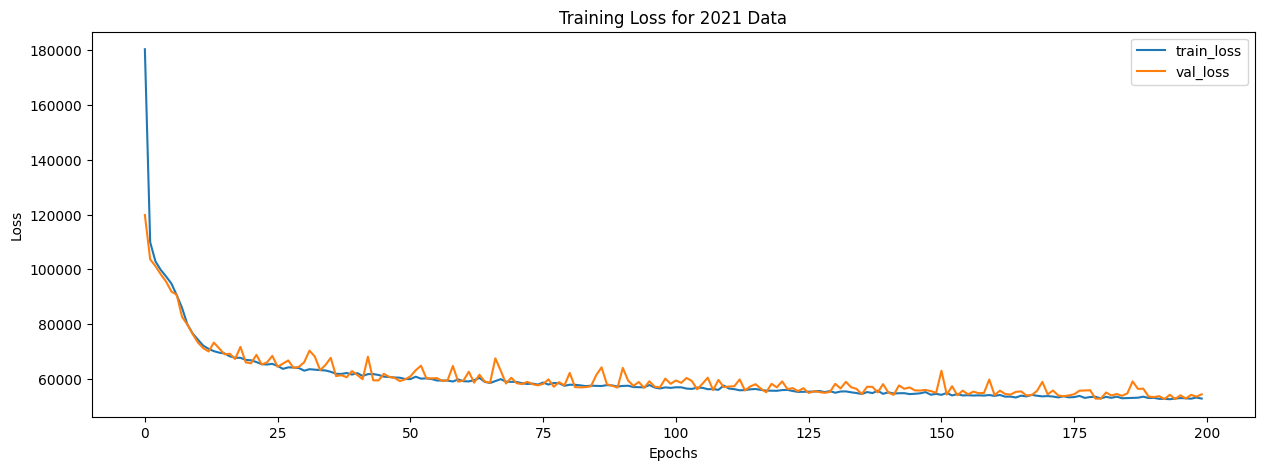

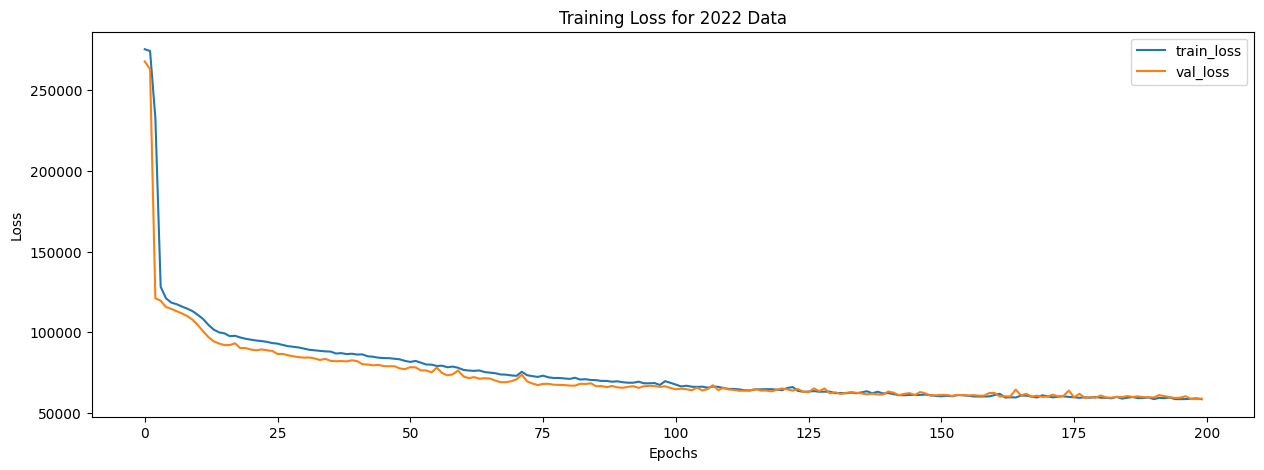

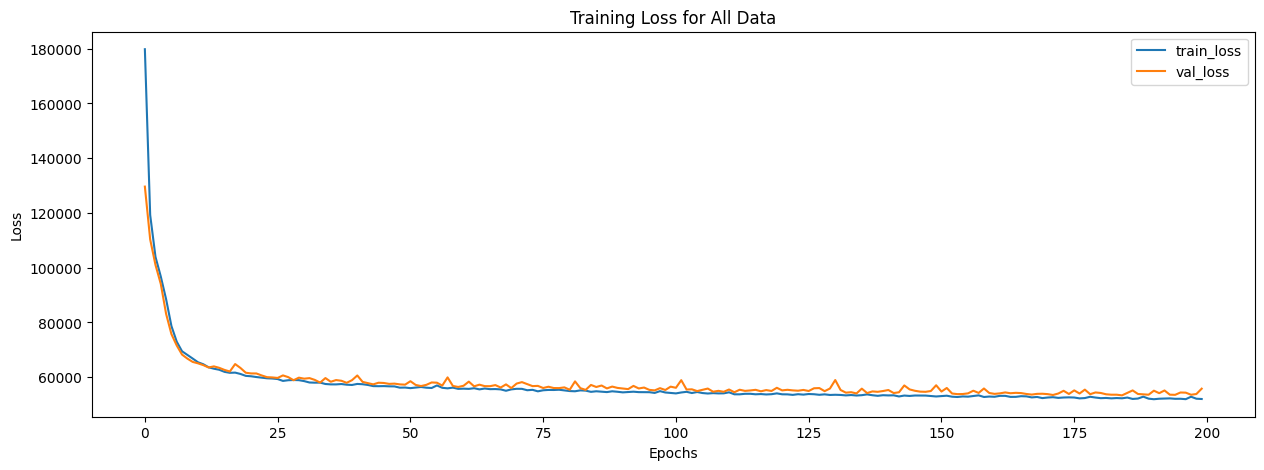

In [17]:
# Visualizar la historia del entrenamiento
def plot_history(history, title):
    plt.figure(figsize=(15,5))
    plt.plot(history.history['loss'], label='train_loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
plot_history(history_2021, 'Training Loss for 2021 Data')
plot_history(history_2022, 'Training Loss for 2022 Data')
plot_history(history_all, 'Training Loss for All Data')